In [1]:
from IPython.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Sans';
font-size:1.8em;
line-height:1.4em;
padding-left:0em;
padding-right:1em;
}

div.text_cell_render p { /* Customize text cells */
margin-top: 0.4em;
}
</style>
""")

# Author: Yu Feng;
# Berkeley Center for Cosmological Physics;
# rainwoodman@gmail.com;
# Berkeley CA. Nov 8th 2016.

# using matplotlib the hard way

- A verbose way of using matplotlib

- some insight into the matplotlib mess



## Outline

- two different views towards matplotlib: state machine vs primitive objects


- state machine : the usual way of using matplotlib

  
- primitive objects : the hard way of using matplotlib

   - We will exercise some layouting of subplots


- Plotting models of data:

   - histogram
   
   - contour
   
   - fitting


## Motivation

- the matplotlib API is extensive

  - An object model of plotting primitives and
  
  - Many many convenient shortcut functions to manipulate the primitives;
  
  - Historically, matplotlib was developed after MATLAB.
  
  - A state machine build around the 'current' Figure, and 'current' Axes.
    
- the state machine perspective mixes with the primitive objects. Examples,

  - http://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
  
  - http://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller

  - and it is confusing.
  
- In this session, let's try to directly interact with matplotlib, via the primitive objects.

- The hard way is actually easier.


In [2]:
# creating the fake data we will use


import numpy

x = numpy.linspace(-4, 4, 1001, endpoint=True)
y = numpy.sin(x)
v = numpy.gradient(y[:-1], numpy.diff(x)[0])

x = x[:-1]
y = y[:-1]
d1 = y + numpy.random.normal(size=x.shape) * 0.4
d2 = v + numpy.random.normal(size=x.shape) * 0.2
numpy.savetxt('matplotlib-the-hard-way.txt', numpy.array([x, d1, d2]).T)

# matplotlib -- the usual way

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


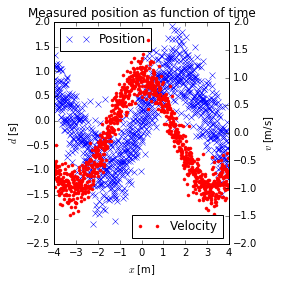

In [4]:
# plot d(t) and v(t) in the same plot

t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)


figure(figsize=(4, 4))

plot(t, d, 'x ', label='Position') 

xlabel(r'$x$ [m]')

ylabel(r'$d$ [s]')

legend(loc='upper left')

twinx()

plot(t, v, '.', label='Velocity', color='red')

ylabel(r'$v$ [m/s]')

title("Measured position as function of time")

legend(loc='lower right')

tight_layout()

savefig("matplotlib-the-hard-way.pdf", dpi=200)

# Fun Fact: This example also demonstrates that side effects are the only
#           desired effects while programming.

# to combine the legend, do this:
#    http://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

## What really happens?

- matplotlib manages a `context` object, which records the `state` of the plot.

- implemented as a set of *global* variables. A `singleton` pattern is very likely invoked.

- current figure -- gcf(), and

- current axes -- gca()



fig = figure(figsize=(4, 4))
# gcf() =  Figure(320x320)
# gcf().axes =  []


plot(t, d, 'x ', label='Position') 
# gcf().axes =  [<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c483cfc50>]
# gcf().axes[0] =  Axes(0.125,0.125;0.775x0.775)
# gca() =  Axes(0.125,0.125;0.775x0.775)
# gca().lines =  [<matplotlib.lines.Line2D object at 0x7f7c423bc668>]
# gca().lines[0] =  Line2D(Position)


xlabel(r'$x$ [m]')
# gca().xaxis.label.get_text() =  $x$ [m]


ylabel(r'$d$ [s]')
# gca().yaxis.label.get_text() =  $d$ [s]


title('Measured position as function of time')
# gca().title.get_text() =  Measured position as function of time


legend(loc='lower right')
# gca().legend_ =  <matplotlib.legend.Legend object at 0x7f7c495f7c18>




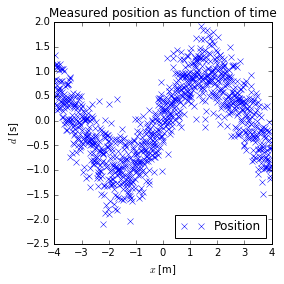

In [34]:
# inspect the state machine.

t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = figure(figsize=(4, 4))

print('fig = figure(figsize=(4, 4))')
print('# gcf() = ', gcf())
print('# gcf().axes = ', fig.axes)
print('\n')
plot(t, d, 'x ', label='Position') 
print("plot(t, d, 'x ', label='Position') ")
print('# gcf().axes = ', fig.axes)
print('# gcf().axes[0] = ', fig.axes[0])
print('# gca() = ', gca())
ax = gca()
print('# gca().lines = ', ax.lines)
print('# gca().lines[0] = ', ax.lines[0])
print('\n')

xlabel(r'$x$ [m]')
print("xlabel(r'$x$ [m]')")
print('# gca().xaxis.label.get_text() = ', ax.xaxis.label.get_text())
print('\n')

ylabel(r'$d$ [s]')
print("ylabel(r'$d$ [s]')")
print('# gca().yaxis.label.get_text() = ', ax.yaxis.label.get_text())
print('\n')

title('Measured position as function of time')
print("title('Measured position as function of time')")
print("# gca().title.get_text() = ", ax.title.get_text())
print('\n')

legend(loc='lower right')
print("legend(loc='lower right')")
print("# gca().legend_ = ", repr(ax.legend_))
print('\n')

tight_layout()

savefig("matplotlib-the-hard-way.pdf", dpi=200)

# matplotlib the hard way

In [6]:
from IPython.display import Image, SVG

In [7]:
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.gridspec import GridSpec


- We create a `scene` from the Figure object.

- GridSpec helps us to align the Axes in the scene

- A canvas `renders` the scene into an image "file".

- We use IPython to load and show the rendered image

## Let's redo the example

- get_legend_handles_labels returns the descriptors for the labeled objects in an `Axes`.

- to join the legends, we create a legend by combining the descriptors of two `Axes`-s.


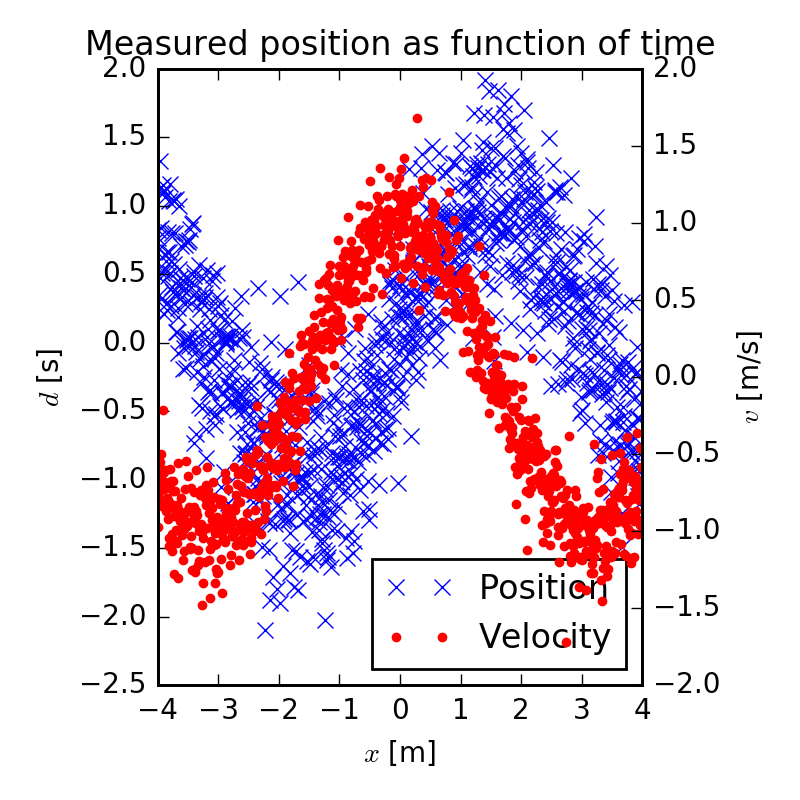

In [8]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(4, 4))
gs = GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])

ax1.plot(t, d, 'x ', label='Position') 

ax1.set_xlabel(r'$x$ [m]')

ax1.set_ylabel(r'$d$ [s]')

ax2 = ax1.twinx()

ax2.plot(t, v, '.', label='Velocity', color='red')

ax2.set_ylabel(r'$v$ [m/s]')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(list(h1) + list(h2), list(l1) + list(l2), loc='lower right')
ax1.set_title("Measured position as function of time")

canvas = FigureCanvasAgg(fig)

fig.tight_layout()

fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png', )

## Refactor

- Once the global context is out of the way, we can

- decouple layouting from plotting

- write a function that plots the data to any given two `Axes` objects.


In [9]:
def plotdata(t, d, v, ax1, ax2):

    ax1.plot(t, d, 'x ', label='Position', color='blue') 

    ax1.set_xlabel(r'$x$ [m]')

    ax1.set_ylabel(r'$d$ [s]')

    ax2.plot(t, v, '.', label='Velocity', color='red')

    ax2.set_ylabel(r'$v$ [m/s]')
    
    ax2.set_xlabel(r'$x$ [m]')


/home/yfeng1/anaconda3/install/lib/python3.5/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


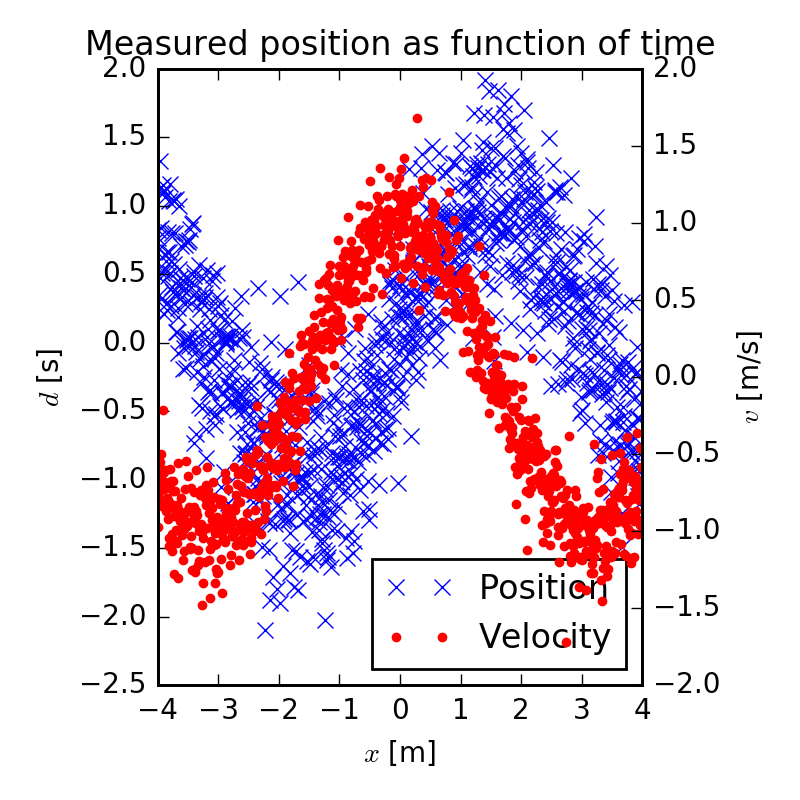

In [10]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(4, 4))

gs = GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])

ax2 = ax1.twinx()

plotdata(t, d, v, ax1, ax2)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(list(h1) + list(h2), list(l1) + list(l2), loc='lower right')
ax1.set_title("Measured position as function of time")
fig.tight_layout()

canvas = FigureCanvasAgg(fig)

fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')

## Split the busy plot to two panels

- Use GridSpec objects for (nrow, ncol) layouting of multiple Axes objects

- use sharex argument of add_subplot to specify shared XAxis objects


/home/yfeng1/anaconda3/install/lib/python3.5/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


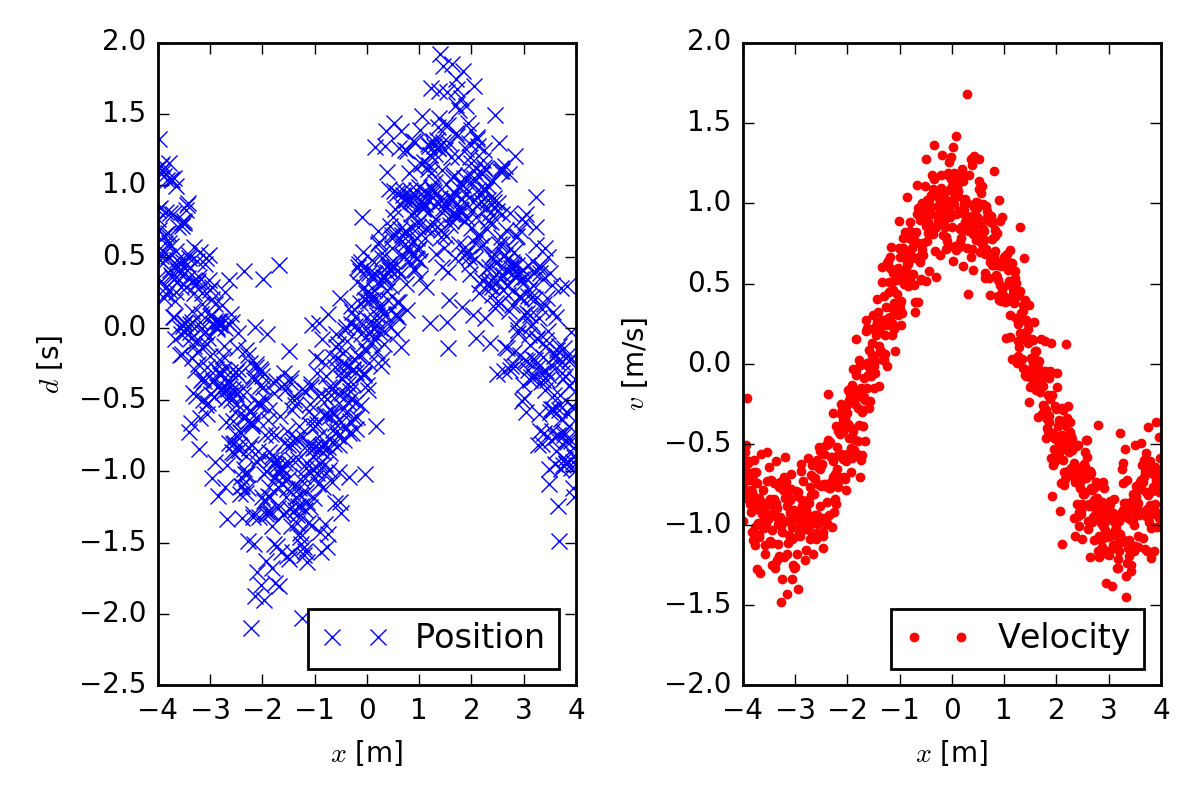

In [11]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(6, 4))
gs = GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1)

plotdata(t, d, v, ax1, ax2)

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

fig.tight_layout()

canvas = FigureCanvasAgg(fig)

fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')

## Picture in Picture?

- add_axes creates an axes at any location of the figure

- it interacts badly with tight_layout()


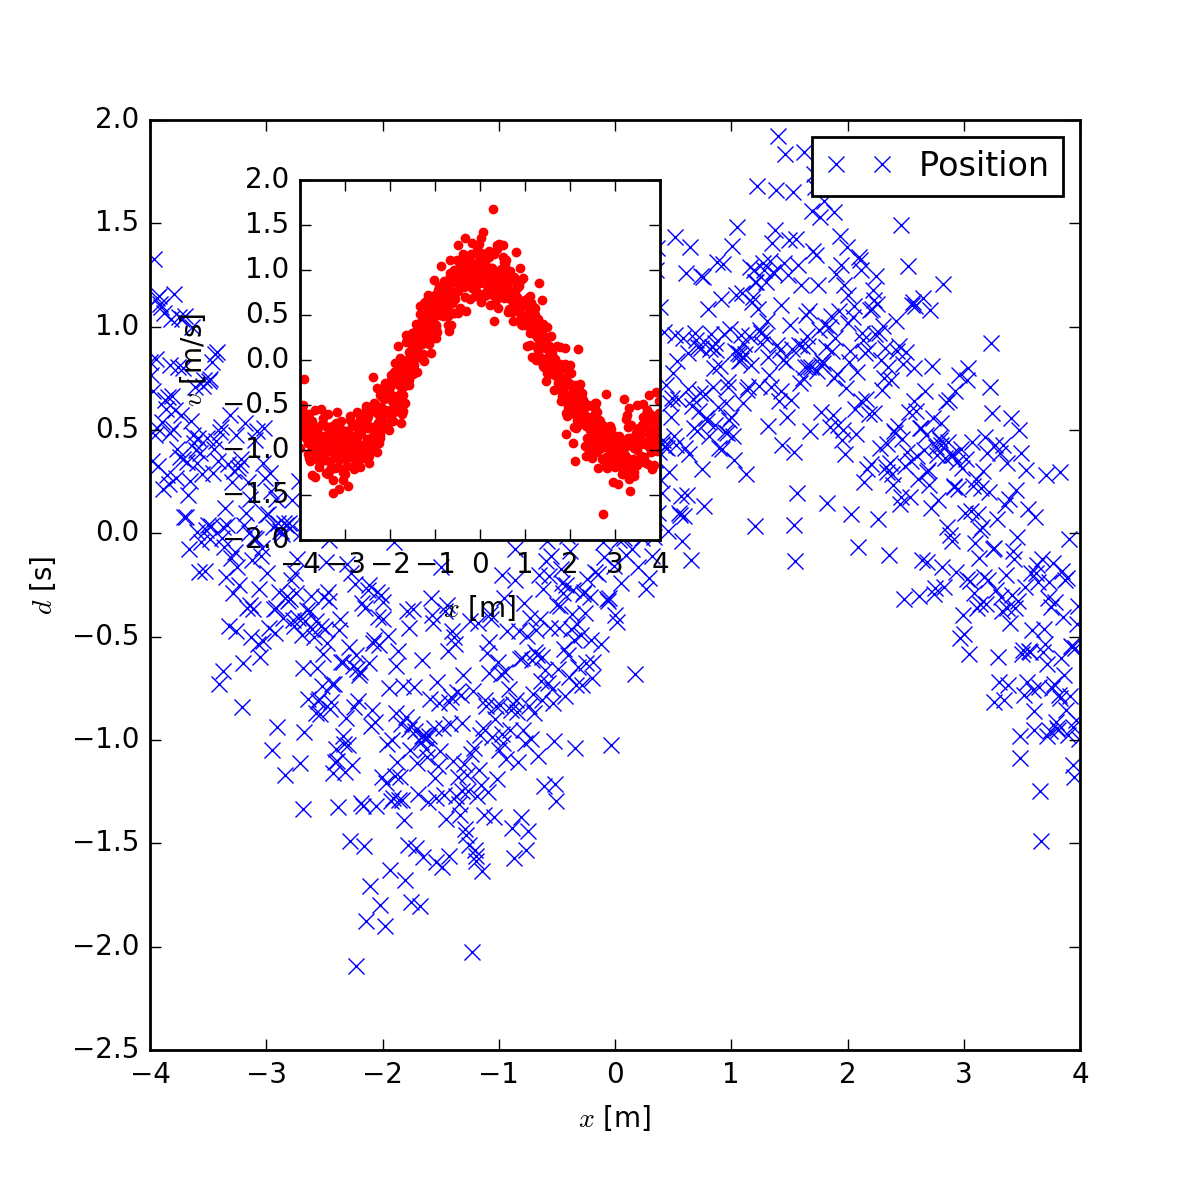

In [12]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(6, 6))

gs = GridSpec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_axes([0.25, 0.55, 0.3, 0.3], sharex=ax1)

plotdata(t, d, v, ax1, ax2)

ax1.legend()
#ax2.legend()

# tight_layout is too smart -- it will stretch ax2 to the full extent of the figure!

# Rational: Since we are customizing the location of Axes, don't do tight_layout.
# fig.tight_layout() 

canvas = FigureCanvasAgg(fig)

fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')

## A vertical layout?



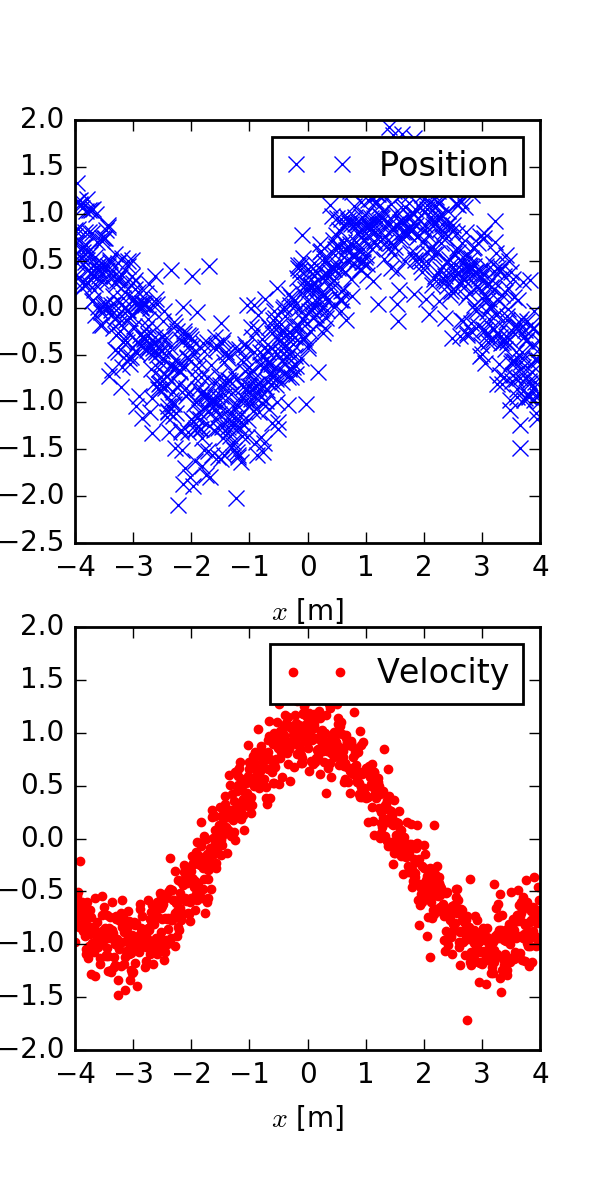

In [13]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(3, 6))

gs = GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)

plotdata(t, d, v, ax1, ax2)

ax1.legend()
ax2.legend()

#fig.tight_layout()

canvas = FigureCanvasAgg(fig)

fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')

# A tighter vertical layout?

- We hide the label and tick labels of the top panel by setting lasbel1On to False of the XAxis

- The `hspace` argument to the GridSpec removes the gap.

- We use a `prune='both'` tick locator to avoid overlapping tick labels in YAxis.


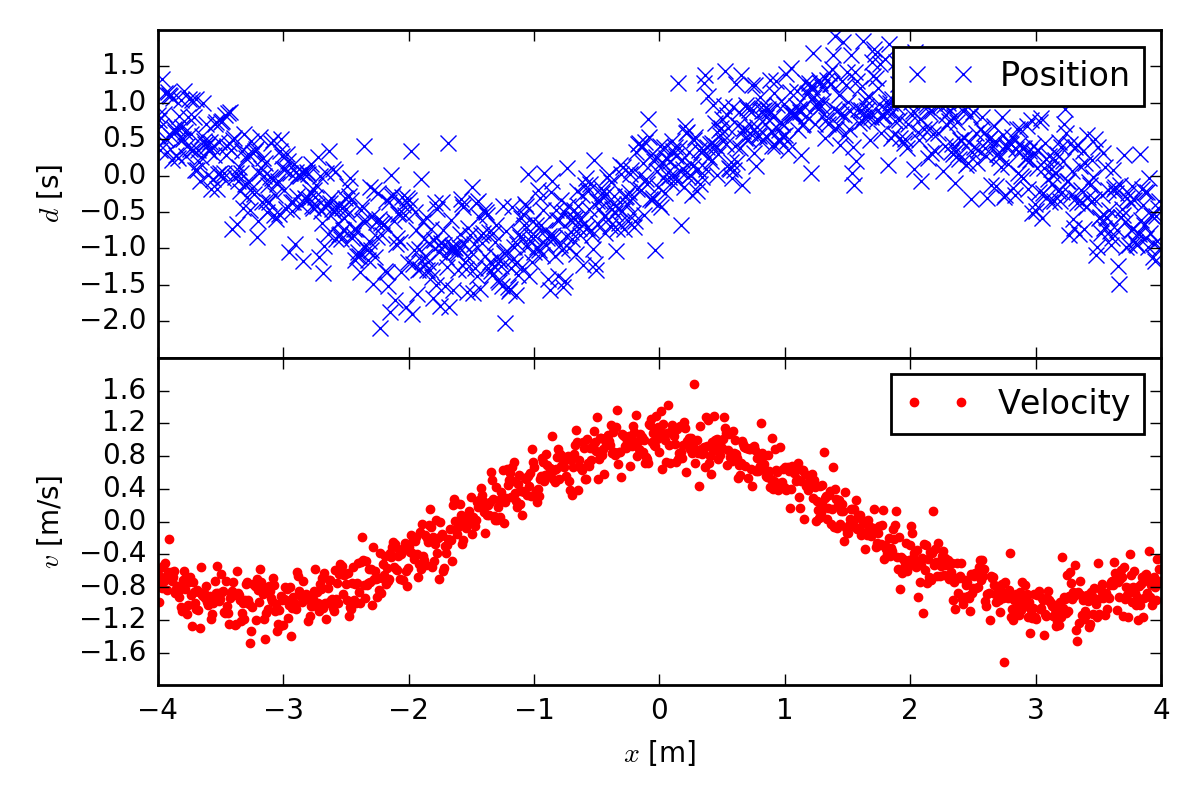

In [14]:
from matplotlib.ticker import MaxNLocator

t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(6, 4))

gs = GridSpec(2, 1, hspace=0)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)

plotdata(t, d, v, ax1, ax2)

ax1.legend()
ax2.legend()

for tick in ax1.xaxis.get_major_ticks():
    tick.label1On = False

ax1.xaxis.label.set_visible(False)
ax1.yaxis.set_major_locator(MaxNLocator(prune='both'))
ax2.yaxis.set_major_locator(MaxNLocator(prune='both'))

canvas = FigureCanvasAgg(fig)
fig.tight_layout()
fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')

## Histogram

- scatter plots suffer from satuation; and it crashes matplotlib sometimes.

- Histograming gives a somewhat fairer view of the data;

- marginalized to 2d.


In [15]:
# creating the fake data we will use


import numpy

x = numpy.linspace(-4, 4, 100001, endpoint=True)
y = numpy.sin(x)
v = numpy.gradient(y[:-1], numpy.diff(x)[0])

x = x[:-1]
y = y[:-1]
d1 = y + numpy.random.normal(size=x.shape) * 0.4
d2 = v + numpy.random.normal(size=x.shape) * 0.2
numpy.savetxt('matplotlib-the-hard-way-big.txt', numpy.array([x, d1, d2]).T)

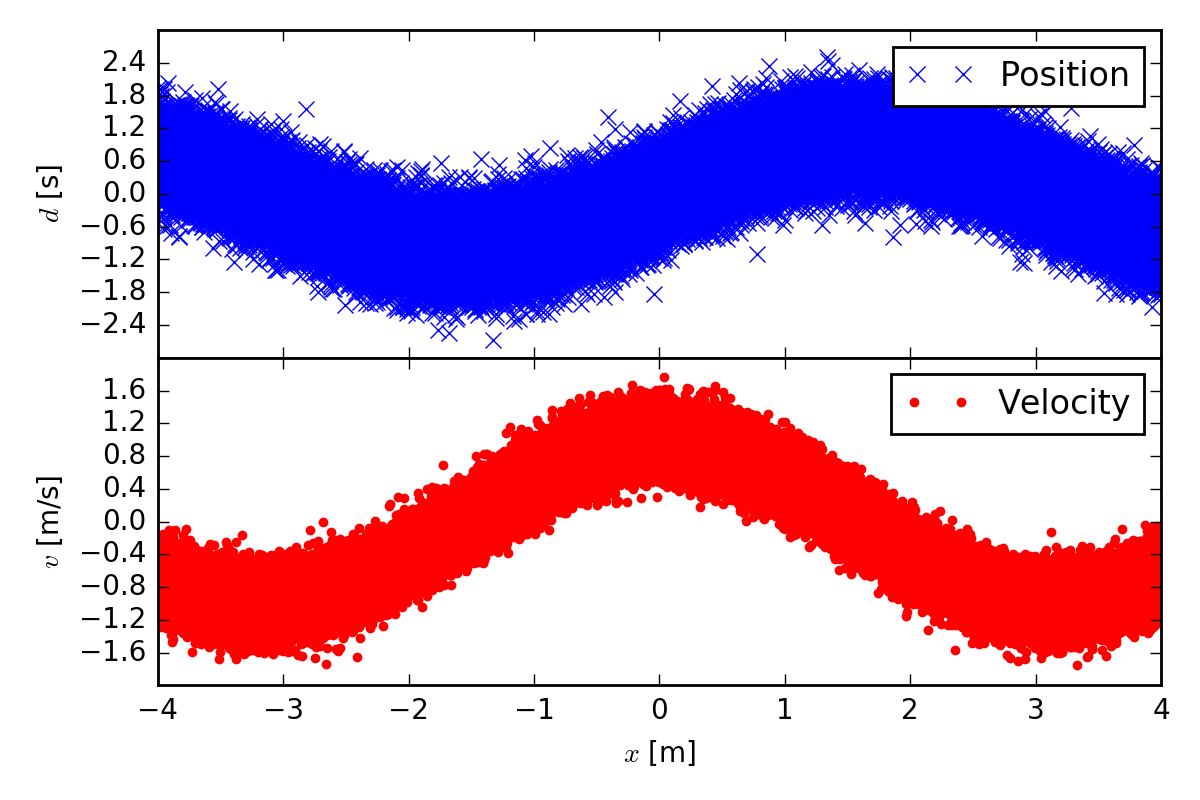

In [17]:
from matplotlib.ticker import MaxNLocator

t, d, v = numpy.loadtxt('matplotlib-the-hard-way-big.txt', unpack=True)

fig = Figure(figsize=(6, 4))

gs = GridSpec(2, 1, hspace=0)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)

plotdata(t, d, v, ax1, ax2)

ax1.legend()
ax2.legend()

for tick in ax1.xaxis.get_major_ticks():
    tick.label1On = False

ax1.xaxis.label.set_visible(False)
ax1.yaxis.set_major_locator(MaxNLocator(prune='both'))
ax2.yaxis.set_major_locator(MaxNLocator(prune='both'))

canvas = FigureCanvasAgg(fig)
fig.tight_layout()
fig.savefig("matplotlib-the-hard-way-big.png", dpi=200)
Image('matplotlib-the-hard-way-big.png')

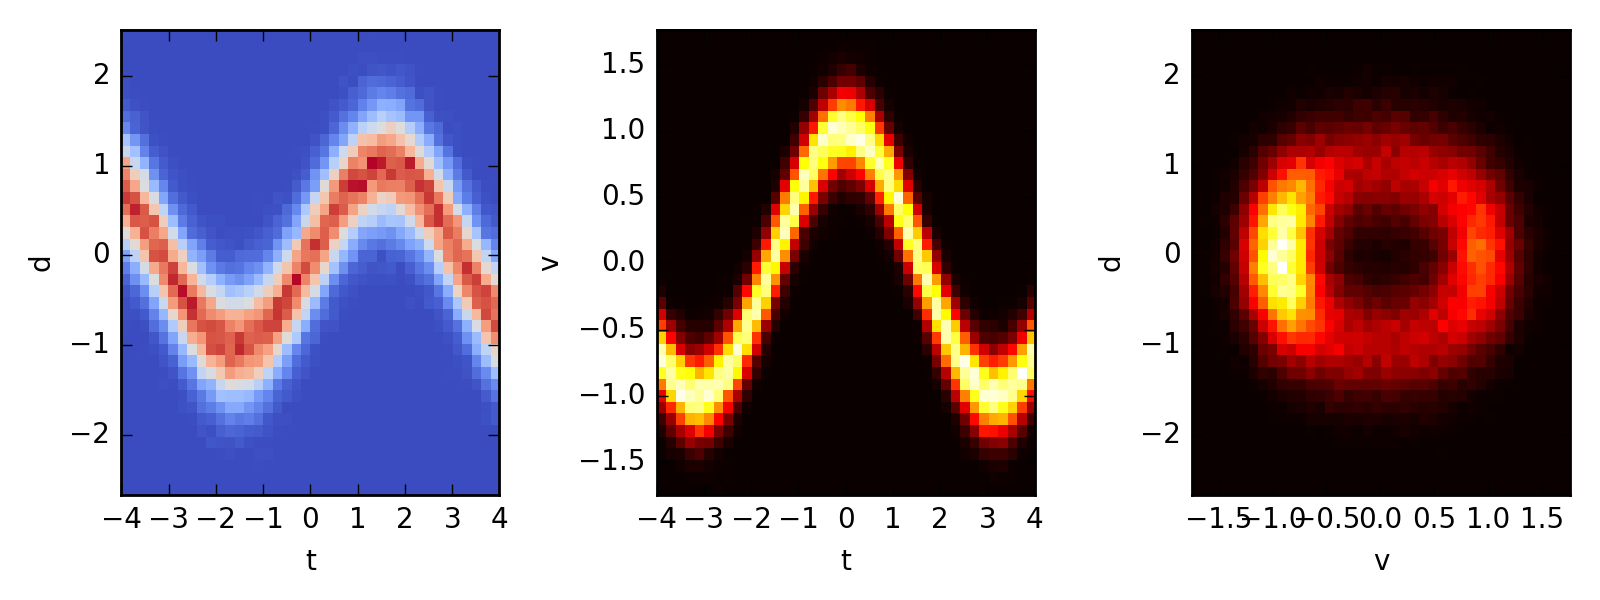

In [21]:
from matplotlib import cm

t, d, v = numpy.loadtxt('matplotlib-the-hard-way-big.txt', unpack=True)

fig = Figure(figsize=(8, 3))

gs = GridSpec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

_ = ax1.hist2d(t, d, bins=40, cmap=cm.coolwarm)
ax1.set_xlabel('t')
ax1.set_ylabel('d')
_ = ax2.hist2d(t, v, bins=40, cmap=cm.hot)
ax2.set_xlabel('t')
ax2.set_ylabel('v')
_ = ax3.hist2d(v, d, bins=40, cmap=cm.hot)
ax3.set_xlabel('v')
ax3.set_ylabel('d')

canvas = FigureCanvasAgg(fig)
fig.tight_layout()
fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')

## Some times contour plots are useful too

- to make a contour, we need to regularize the scatter points to a Grid.

- `numpy.histogram2d` does this for us.

- A transpose of the historgram needed because of the width/height v.s. X/Y convention 

- 


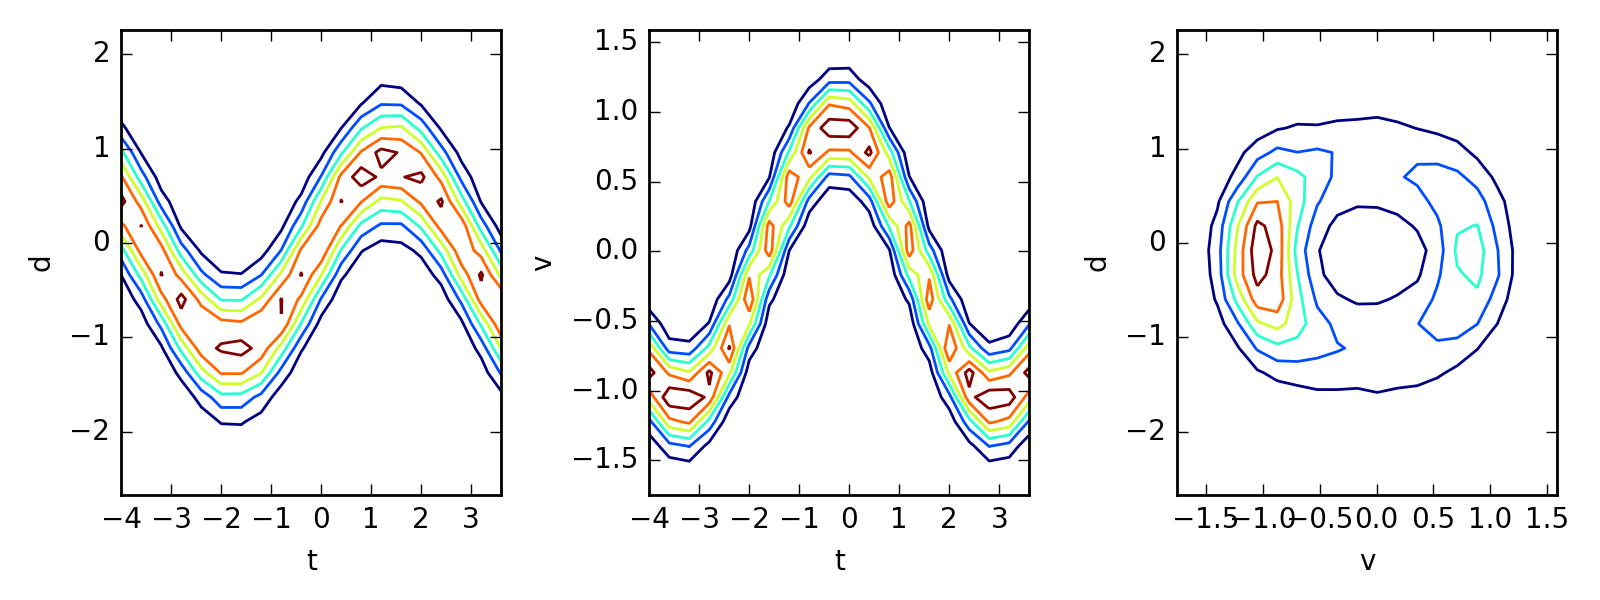

In [22]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way-big.txt', unpack=True)

fig = Figure(figsize=(8, 3))

gs = GridSpec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

h, xbins, ybins = numpy.histogram2d(t, d, bins=20)
_ = ax1.contour(xbins[:-1], ybins[:-1], h.T)
ax1.set_xlabel('t')
ax1.set_ylabel('d')
h, xbins, ybins = numpy.histogram2d(t, v, bins=20)
_ = ax2.contour(xbins[:-1], ybins[:-1], h.T)
ax2.set_xlabel('t')
ax2.set_ylabel('v')
h, xbins, ybins = numpy.histogram2d(v, d, bins=20)
_ = ax3.contour(xbins[:-1], ybins[:-1], h.T)
ax3.set_xlabel('v')
ax3.set_ylabel('d')

canvas = FigureCanvasAgg(fig)

fig.tight_layout()
fig.savefig("matplotlib-the-hard-way-big.png", dpi=200)
Image('matplotlib-the-hard-way-big.png')

## Fitting a model to the data.

- the ultimate goal of plotting is to reveal the underlying model of data

- a wide range of model is smooth, parametric, and measurable;

- they are favourable models because they are easy to interprete;

- fitting / chi square minimization reveals the model from data;

- need external help beyond matplotlib.

In [23]:
import autograd
import autograd.numpy
from scipy.optimize import minimize, check_grad

In [24]:
def model(t, p):
    # Let fit out data with a harmonic oscillator.
    
    A, B, phase0 = p
    d = A * autograd.numpy.cos(B * t - phase0)
    v = - A * B * autograd.numpy.sin(B * t - phase0)
    return d, v

def fitting(t, d, v, sigma_d = 0.4, sigma_v = 0.2):
    
    def objective(p):
        # the covariance between model_d and model_v is complicated
        # thus we only use model_d in this example.
        model_d, model_v = model(t, p)
        xi2_d = (model_d - d) ** 2 
        
        return xi2_d.sum() /  sigma_d ** 2
    
    # autograd gives the gradient and hessian
    
    gradient = autograd.grad(objective)
    hessian = autograd.hessian(objective)
    
    p0 = (1., 1., 0.)
    print('objective', objective(p0))
    print('Check grad', check_grad(objective, gradient, p0))
    
    r = minimize(objective, p0, method='BFGS', jac=gradient)
    
    # hessian gives the covariance on the parameters
    # and inverted hessian gives the error.
    
    cov = hessian(r.x)
    err = numpy.diag(numpy.linalg.inv(cov + 1e-9) ** 0.5)
    
    def best(t):
        return model(t, r.x)
    
   
    return r.x, err, r, best

t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

pstar, err, r, best = fitting(t, d, v)

print(r)


objective 7238.476424
Check grad 0.000240101506037
      fun: 993.6617285026109
 hess_inv: array([[  1.87921845e-04,  -2.73100162e-06,   3.90112707e-06],
       [ -2.73100162e-06,   2.28873162e-05,   7.87841268e-07],
       [  3.90112707e-06,   7.87841268e-07,   1.45575113e-04]])
      jac: array([  7.23889862e-07,   4.42005206e-06,   1.54309843e-06])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 14
     njev: 22
   status: 0
  success: True
        x: array([ 1.00304322,  0.9959888 ,  1.56730017])


/home/yfeng1/anaconda3/install/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in sqrt


In [35]:
def plotdata3(t, d, v, ax1, ax2, ax3):

    ax1.plot(t, d, 'x ', label='Position', color='blue') 

    ax1.set_xlabel(r'$x$ [m]')

    ax1.set_ylabel(r'$d$ [s]')

    ax2.plot(t, v, '.', label='Velocity', color='red')

    ax2.set_ylabel(r'$v$ [m/s]')
    
    ax2.set_xlabel(r'$x$ [m]')
    
    ax3.plot(v, d, '.', label='(d, v)', color='green')

    ax3.set_ylabel(r'$d$ [m]')
    
    ax3.set_xlabel(r'$v$ [m/s]')

    
def plotfit3(t, d, v, ax1, ax2, ax3, label, color):

    ax1.plot(t, d, '-', label=label, color=color) 

    ax1.set_xlabel(r'$x$ [m]')

    ax1.set_ylabel(r'$d$ [s]')

    ax2.plot(t, v, '-', label=label, color=color)

    ax2.set_ylabel(r'$v$ [m/s]')
    
    ax2.set_xlabel(r'$x$ [m]')
    
    ax3.plot(v, d, '-', label=label, color=color)

    ax3.set_ylabel(r'$d$ [m]')
    
    ax3.set_xlabel(r'$v$ [m/s]')


/home/yfeng1/anaconda3/install/lib/python3.5/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


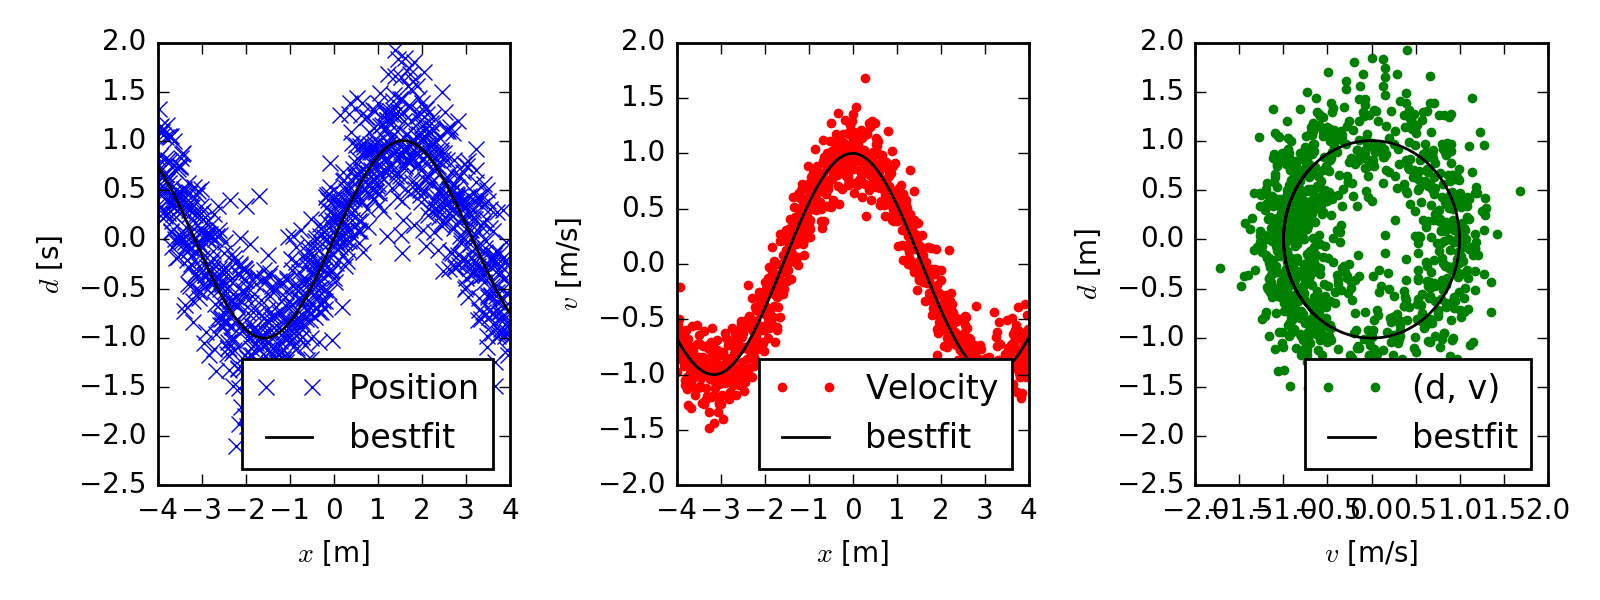

In [36]:
t, d, v = numpy.loadtxt('matplotlib-the-hard-way.txt', unpack=True)

fig = Figure(figsize=(8, 3))
gs = GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1)
ax3 = fig.add_subplot(gs[0, 2])

plotdata3(t, d, v, ax1, ax2, ax3)

dfit, vfit = best(t)
plotfit3(t, dfit, vfit, ax1, ax2, ax3, 'bestfit', color='k')

ax1.legend(frameon=True, loc='lower right')
ax2.legend(frameon=True, loc='lower right')
ax3.legend(frameon=True, loc='lower right')

fig.tight_layout()

canvas = FigureCanvasAgg(fig)

fig.savefig("matplotlib-the-hard-way.png", dpi=200)
Image('matplotlib-the-hard-way.png')